## Data Analysis for Round 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('./../')  # Add the parent directory to Python path
from plot_utils_CY import *

### Outline
1. Data Loading: Load your trading data into a Pandas DataFrame. This could be in the form of a CSV file, a database query result, or any other structured data format.
1. Data Cleaning: Clean the data by handling missing values, removing duplicates, and converting data types if necessary.
1. Data Manipulation: Perform data manipulation tasks such as calculating returns, creating new features, or aggregating data.
1. Data Analysis: Analyze the trading data using statistical methods and visualizations.
1. Performance Metrics: Calculate performance metrics such as Sharpe Ratio, Maximum Drawdown, and Win Rate.
1. Visualization: Visualize performance metrics and other relevant information using Matplotlib or other plotting libraries.

### Data Loading
* Loading price data and trade data into dataframes
* Merging data of the same format from different days

In [4]:
path = '../../shared_data/round3/'
days = [0, 1, 2]

prices = [pd.read_csv(path + f'prices_round_3_day_{d}.csv', sep=';') for d in days]
price = pd.concat(prices)
price

day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
0        0          0     CHOCOLATE         7999           111          NaN   
1        0          0  STRAWBERRIES         3999           210          NaN   
2        0          0         ROSES        14999            72          NaN   
3        0          0   GIFT_BASKET        71348            19      71347.0   
4        0        100   GIFT_BASKET        71344             1      71343.0   
...    ...        ...           ...          ...           ...          ...   
39995    2     999800   GIFT_BASKET        69537             2      69536.0   
39996    2     999900     CHOCOLATE         7749           143          NaN   
39997    2     999900   GIFT_BASKET        69551             1      69550.0   
39998    2     999900  STRAWBERRIES         3984           240          NaN   
39999    2     999900         ROSES        14411            59          NaN   

       bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0               NaN          NaN           NaN         8001           111   
1               NaN          NaN           NaN         4001           210   
2               NaN          NaN           NaN        15001            72   
3              24.0          NaN           NaN        71362            19   
4              12.0      71342.0          20.0        71355             1   
...             ...          ...           ...          ...           ...   
39995          18.0      69535.0          24.0        69547             2   
39996           NaN          NaN           NaN         7751           143   
39997          19.0      69549.0          20.0        69561             1   
39998           NaN          NaN           NaN         3985            92   
39999           NaN          NaN           NaN        14412            59   

       ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0              NaN           NaN          NaN           NaN     8000.0   
1              NaN           NaN          NaN           NaN     4000.0   
2              NaN           NaN          NaN           NaN    15000.0   
3          71363.0          24.0          NaN           NaN    71355.0   
4          71356.0          12.0      71357.0          20.0    71349.5   
...            ...           ...          ...           ...        ...   
39995      69548.0          18.0      69550.0          24.0    69542.0   
39996          NaN           NaN          NaN           NaN     7750.0   
39997      69562.0          19.0      69564.0          20.0    69556.0   
39998       3986.0         148.0          NaN           NaN     3984.5   
39999          NaN           NaN          NaN           NaN    14411.5   

       profit_and_loss  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
39995              0.0  
39996              0.0  
39997              0.0  
39998              0.0  
39999              0.0  

[120000 rows x 17 columns]

In [5]:
trades = [pd.read_csv(path + f'trades_round_3_day_{d}_nn.csv', sep=';', ).assign(day=d) for d in days]
trade = pd.concat(trades)
trade

timestamp  buyer  seller        symbol   currency    price  quantity  \
0             0    NaN     NaN     CHOCOLATE  SEASHELLS   8001.0         8   
1             0    NaN     NaN         ROSES  SEASHELLS  15001.0         3   
2           200    NaN     NaN         ROSES  SEASHELLS  15000.0         3   
3           500    NaN     NaN  STRAWBERRIES  SEASHELLS   3999.0        10   
4          1000    NaN     NaN   GIFT_BASKET  SEASHELLS  71360.0         2   
...         ...    ...     ...           ...        ...      ...       ...   
3787     997900    NaN     NaN   GIFT_BASKET  SEASHELLS  69478.0         5   
3788     998400    NaN     NaN  STRAWBERRIES  SEASHELLS   3985.0         4   
3789     998800    NaN     NaN     CHOCOLATE  SEASHELLS   7752.0         7   
3790     998900    NaN     NaN   GIFT_BASKET  SEASHELLS  69550.0         5   
3791     998900    NaN     NaN         ROSES  SEASHELLS  14404.0         5   

      day  
0       0  
1       0  
2       0  
3       0  
4       0  
...   ...  
3787    2  
3788    2  
3789    2  
3790    2  
3791    2  

[11348 rows x 8 columns]

### Data Cleaning
* Counting the number of missing values in the data, per column

In [6]:
price.isna().sum()

day                    0
timestamp              0
product                0
bid_price_1            0
bid_volume_1           0
bid_price_2        65244
bid_volume_2       65244
bid_price_3        99723
bid_volume_3       99723
ask_price_1            0
ask_volume_1           0
ask_price_2        65236
ask_volume_2       65236
ask_price_3        99720
ask_volume_3       99720
mid_price              0
profit_and_loss        0
dtype: int64

In [7]:
trade.isna().sum()

timestamp        0
buyer        11348
seller       11348
symbol           0
currency         0
price            0
quantity         0
day              0
dtype: int64

### Data Manipulation
* Truncating the data for the backtester, take 10% of data from each day
* Calculating average daily pricing of products. Verifying if the average is the same as the `mid_price`

### Data Visualization Outline
Exploratory data visualization: for each day and each product, make -
1. An overlayed time series plot of prices
   * line of `mid_price`
   * scatter of `bid_price_1` sized by `bid_volume_1`
   * scatter of `ask_price_1` sized by `ask_volume_1`
   * scatter of `price` sized by `quantity` (from `trade` dataframe)

1. A time series plot of trade that happpened with empty strategy
   * scatter of `price` sized by `quantity`

Statistical visualization: for `AMETHYSTS` - 
1. A time series plot of moving average 
   * line of `mid_price`
   * line of moving average of `mid_price`

1. A histogram of trade price
   * histogram of `price`, scaled by `quantity`

1. Plots of individual bids and asks distribution
   * histogram of `bid_price_1`, scaled by 'bid_volume_1'
   * histogram of `ask_price_1`, scaled by 'ask_volume_1'

1. A histogram of bid-ask spread
   * histogram of `bid_price_1` - `ask_price_1`

1. An overlayed line plot of trade quantity at a price point
   * when `price` = 9995
   * when `price` = 9996
   * when `price` = 9998
   * when `price` = 10000
   * when `price` = 10002
   * when `price` = 10004
   * when `price` = 10005

Statistical visualization: for `STARFRUIT` - 
1. A time series plot of moving average 
   * line of `mid_price`
   * line of moving average of `mid_price`

1. statistics (difference subtracting the moving average...)
1. statistics (trying different windows for moving average?)

### Exploratory Data Visualization

An overlayed time series plot of prices
   * line of `mid_price`
   * scatter of `bid_price_1` sized by `bid_volume_1`
   * scatter of `ask_price_1` sized by `ask_volume_1`
   * scatter of `price` sized by `quantity` (from `trade` dataframe)

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


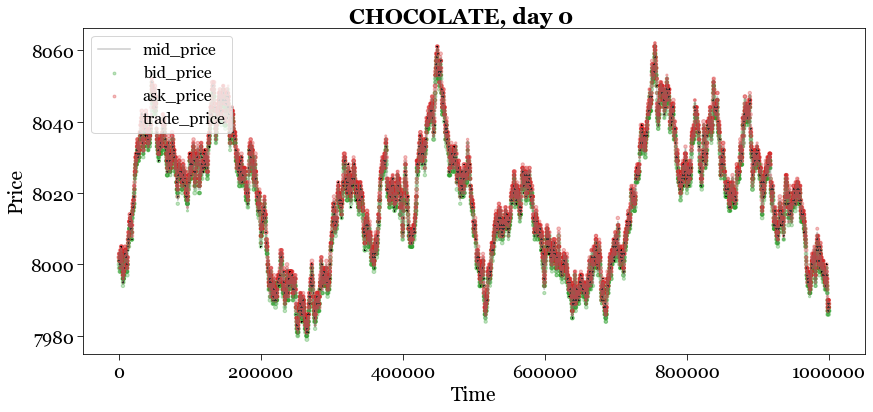

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


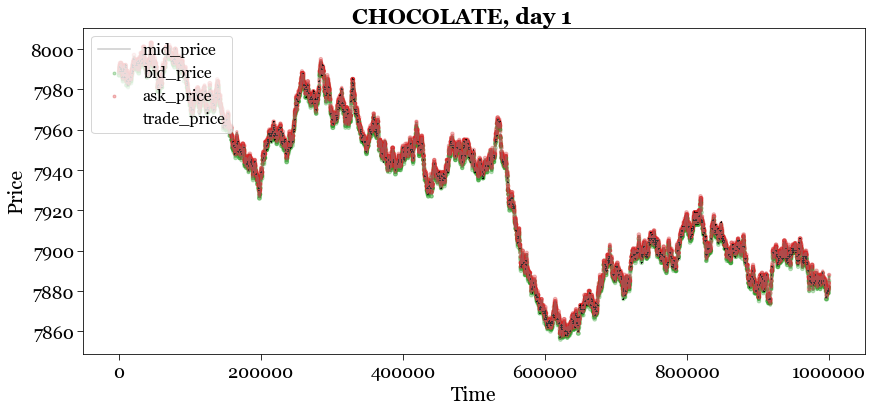

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


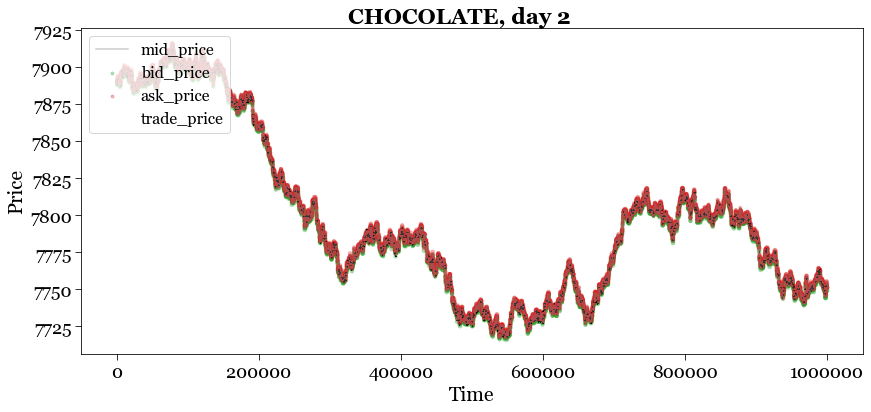

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


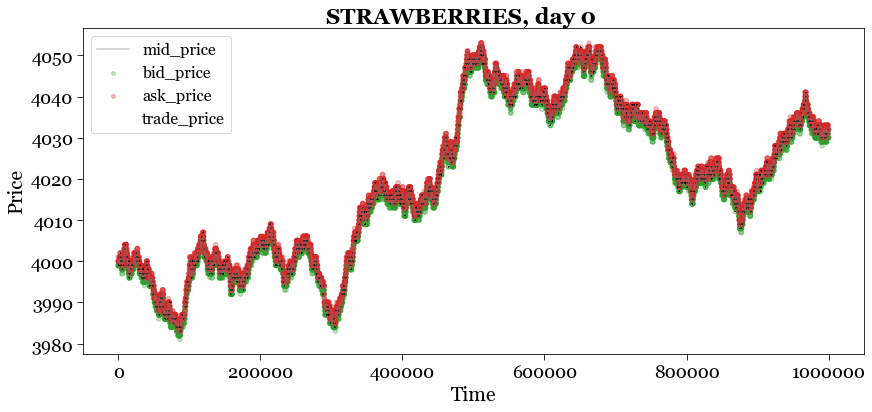

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


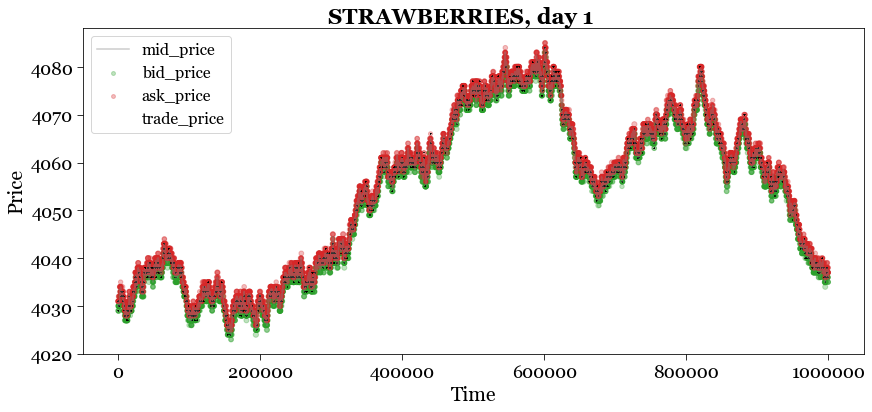

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


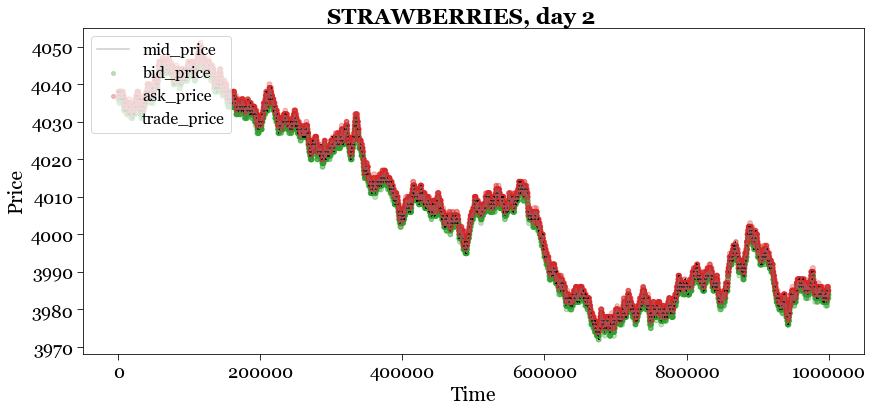

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


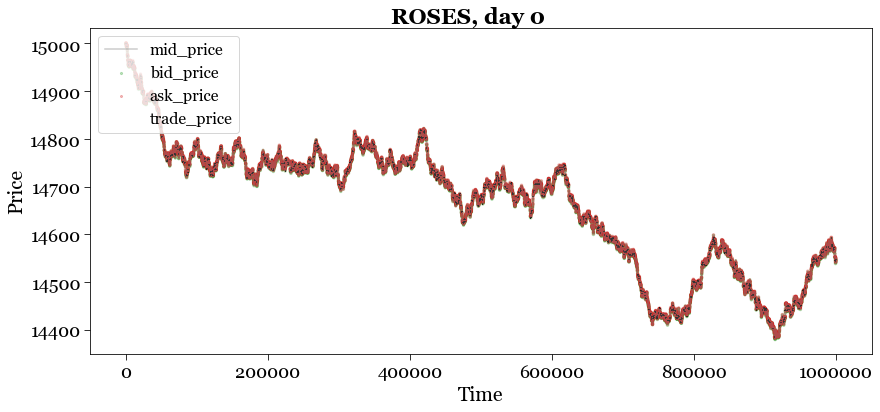

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


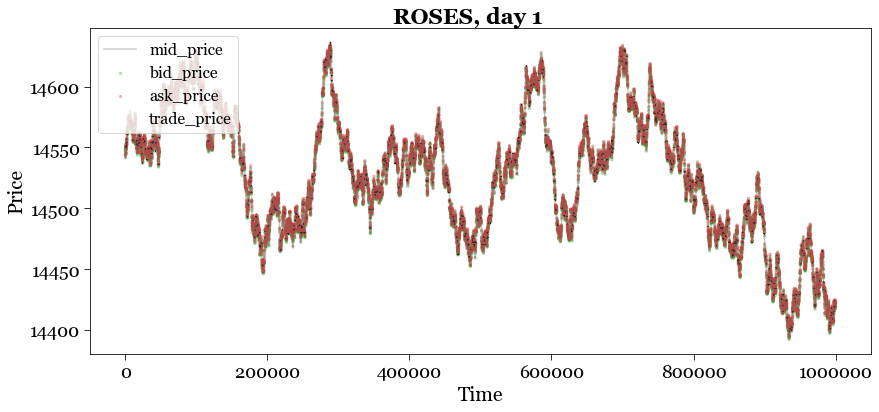

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


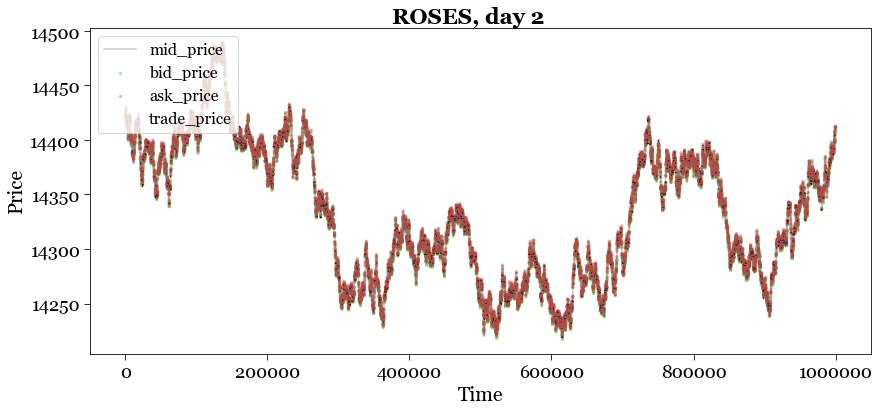

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


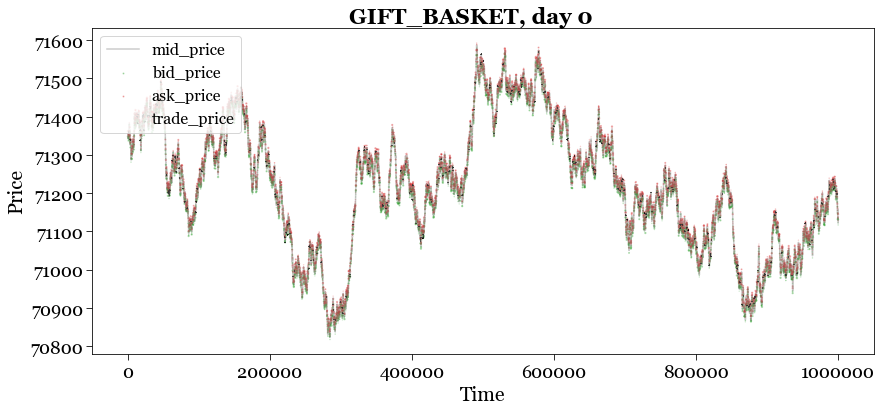

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


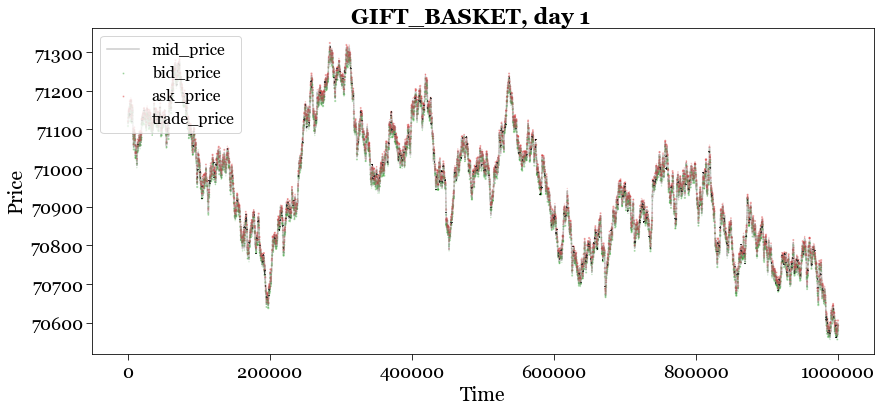

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


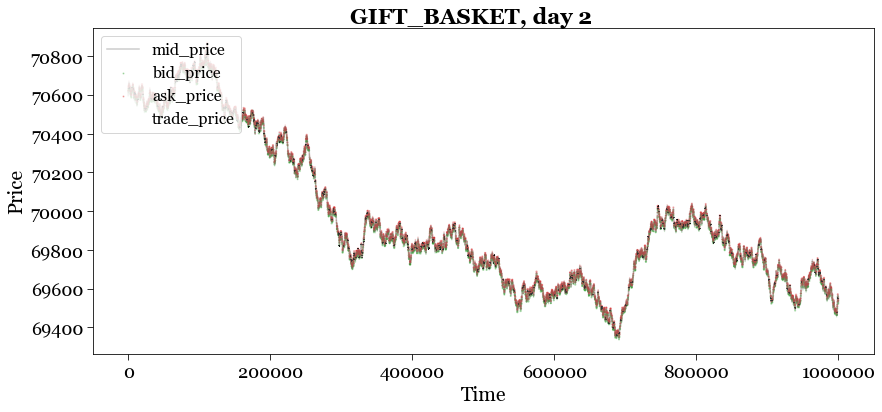

In [9]:
# Overlayed time series plot of prices
products = price['product'].unique()

for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        xs = filtered_price['timestamp']
        mids = filtered_price['mid_price']
        bids = filtered_price['bid_price_1']
        asks = filtered_price['ask_price_1']
        ax.plot(xs, mids, label='mid_price', 
                color=tableau_colors[7], alpha=0.4)
        ax.scatter(xs, bids, label='bid_price', alpha=0.3,
                   color=tableau_colors[2], marker='o', s=0.1*filtered_price['bid_volume_1'])
        ax.scatter(xs, asks, label='ask_price', alpha=0.3,
                   color=tableau_colors[3], marker='o', s=0.1*filtered_price['ask_volume_1'])
        ax.scatter(filtered_trade['timestamp'], filtered_trade['price'], label='trade_price', alpha=1,
                   color='black', marker='+', s=0.1*filtered_trade['quantity'])

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R3_{product}_day{day}_prices.png')
        # plt.savefig(f'./../plots/R3_{product}_day{day}_prices.pdf')
        plt.show()

A time series plot of trade that happpened with empty strategy
   * scatter of `price` sized by `quantity`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


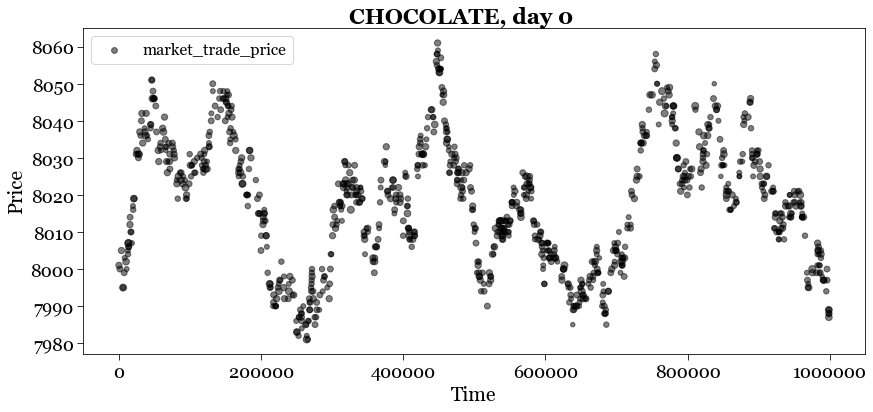

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


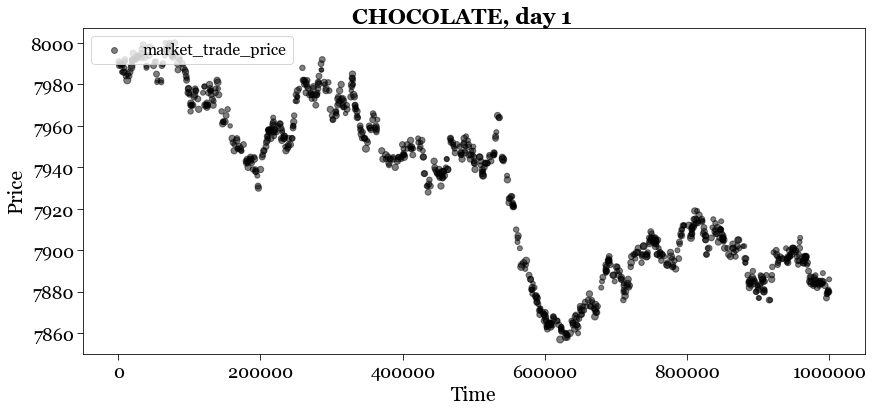

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


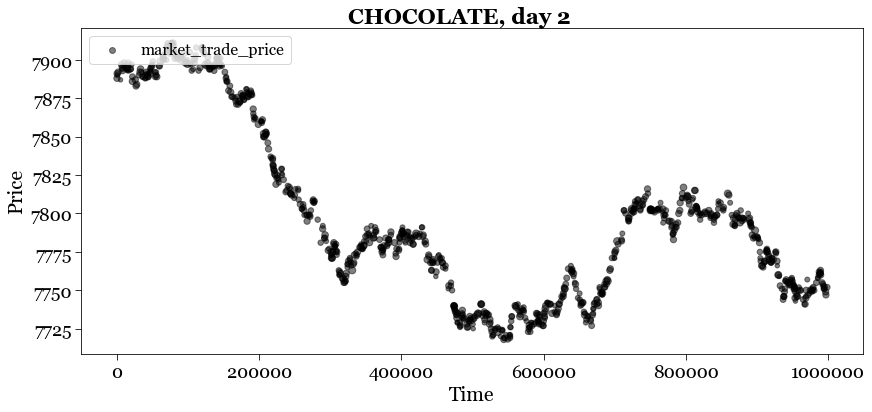

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


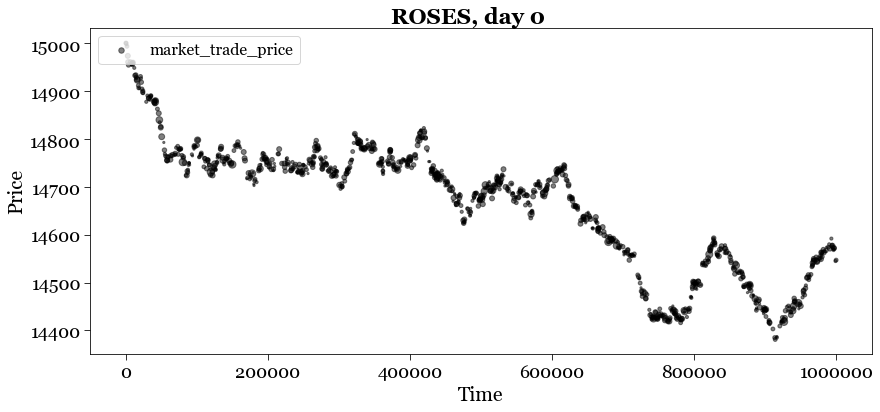

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


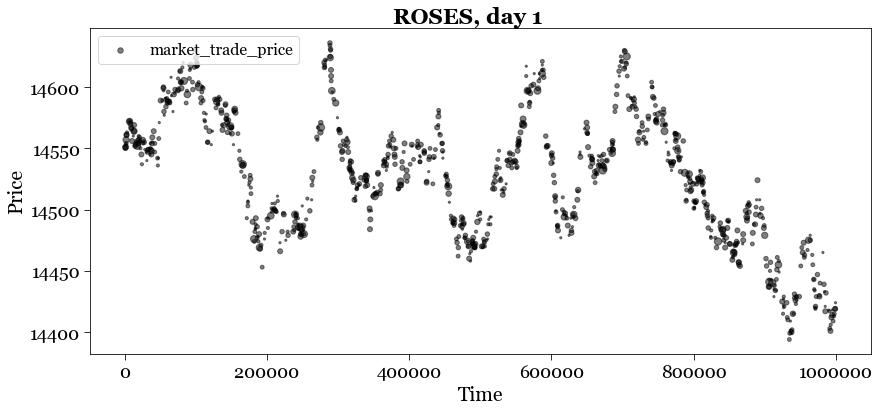

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


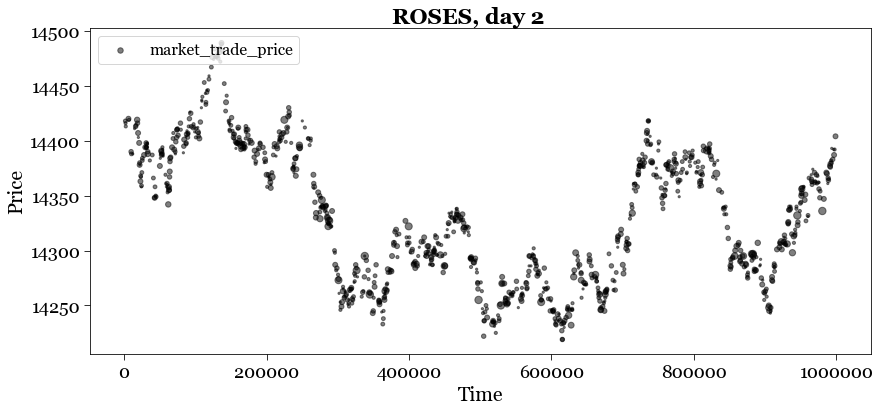

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


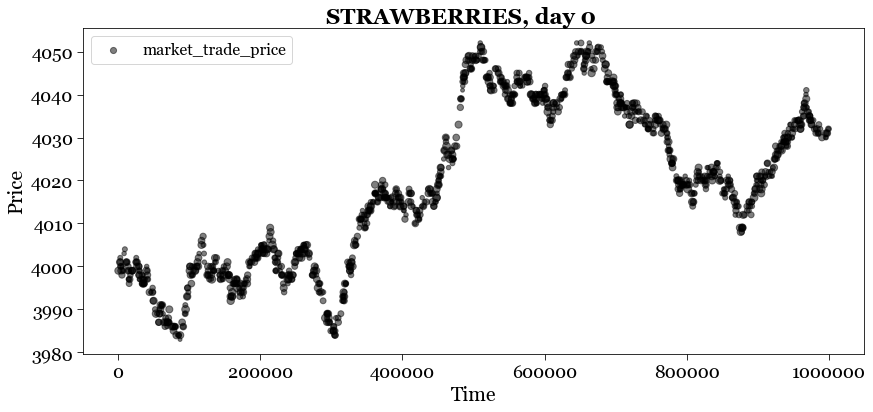

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


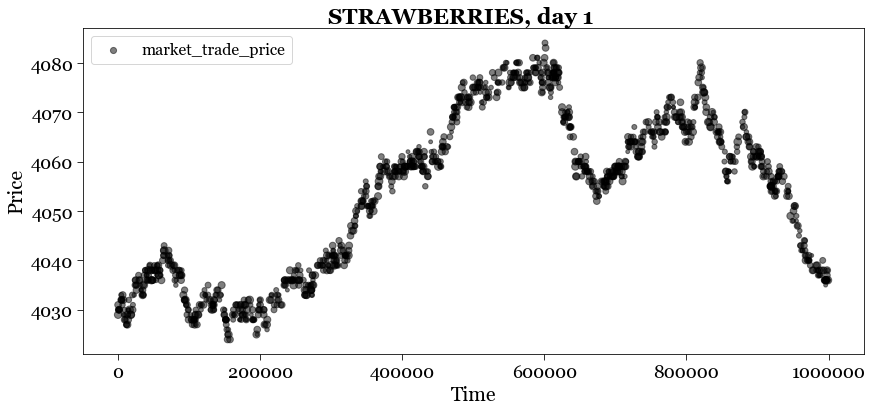

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


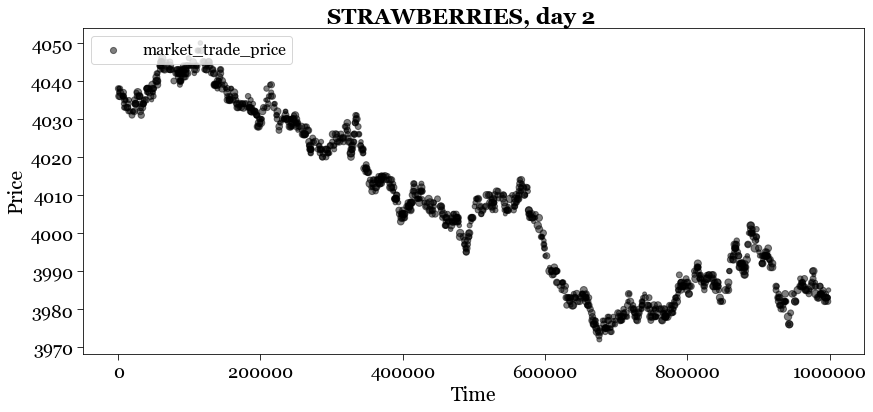

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


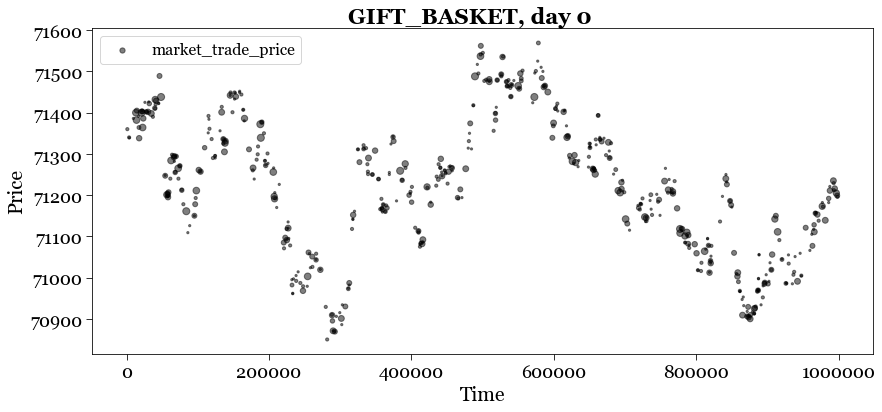

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


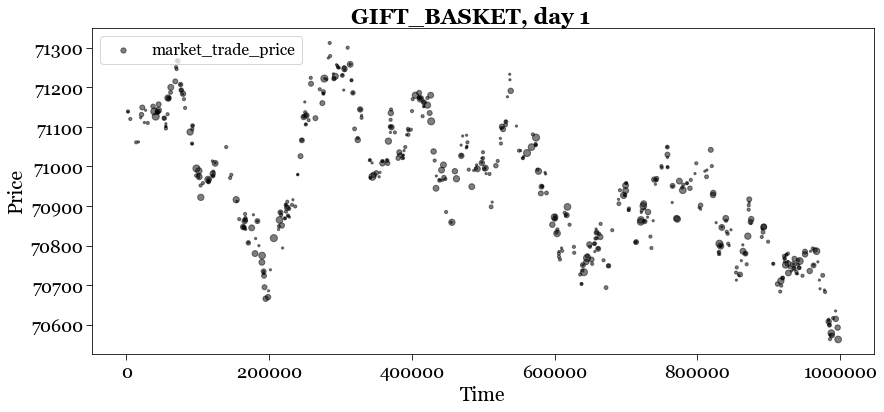

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


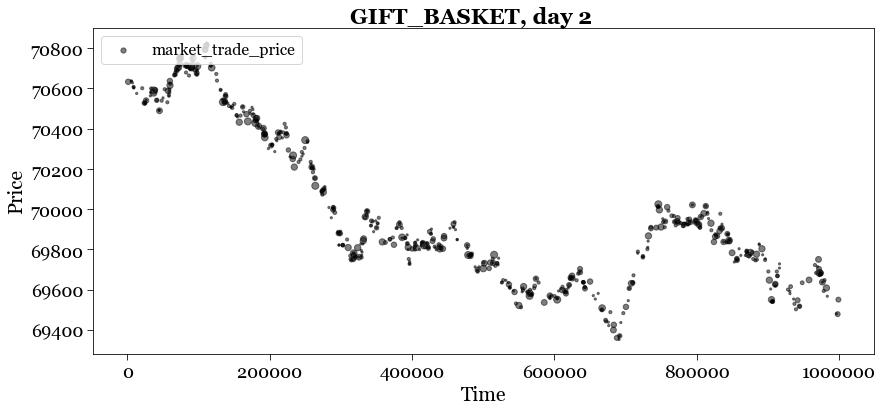

In [10]:
products = trade['symbol'].unique()

for product in products:
    for day in days:
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]

        ax.scatter(filtered_trade['timestamp'], filtered_trade['price'], label='market_trade_price', alpha=0.5,
                   color='black', marker='o', s=5*filtered_trade['quantity'])

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R3_{product}_day{day}_market_trade_price.png')
        # plt.savefig(f'./../plots/R3_{product}_day{day}_market_trade_price.pdf')
        plt.show()

A time series plot of moving average 
   * line of `mid_price`
   * line of moving average of `mid_price`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


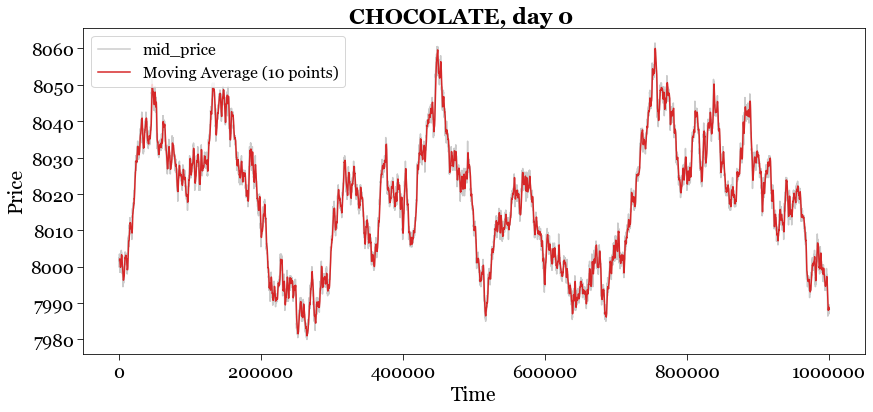

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


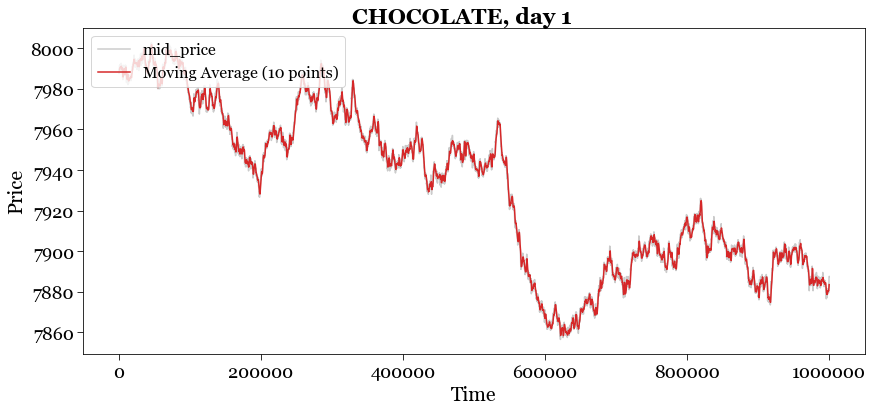

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


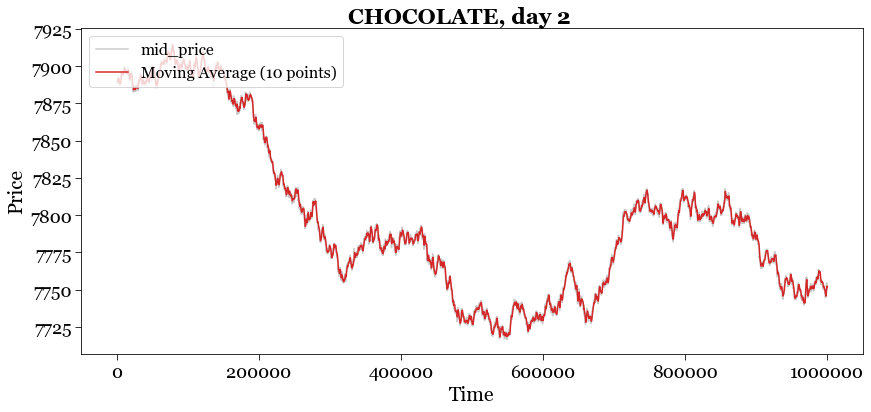

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


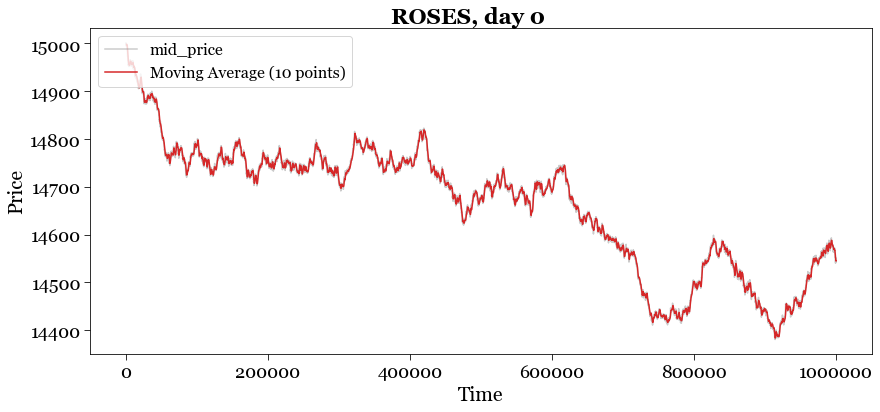

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


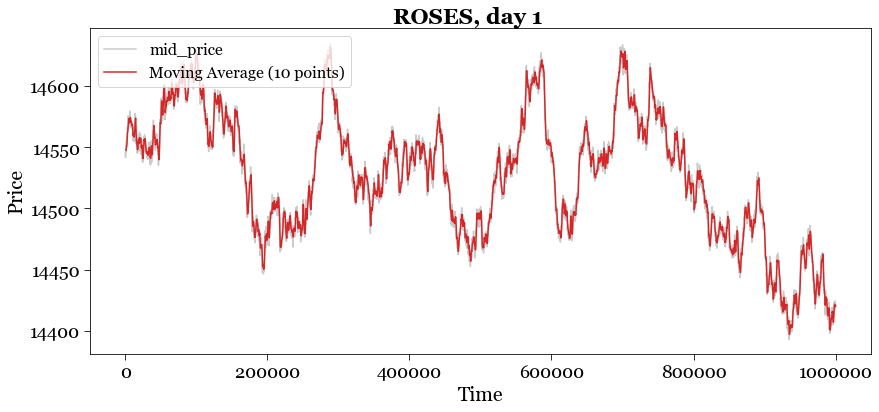

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


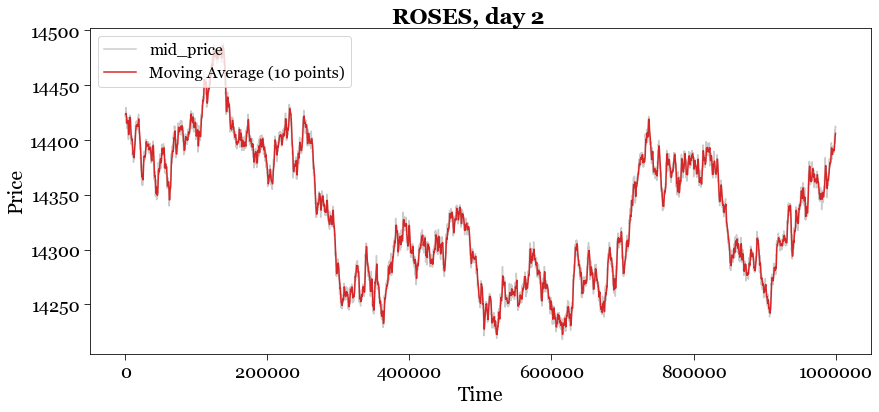

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


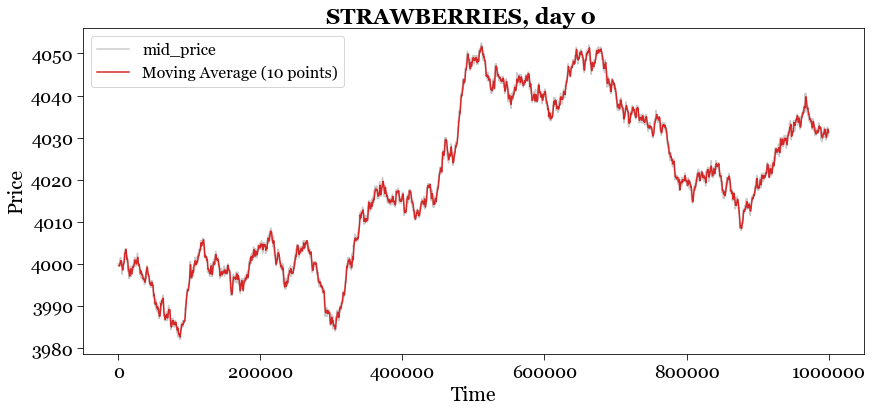

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


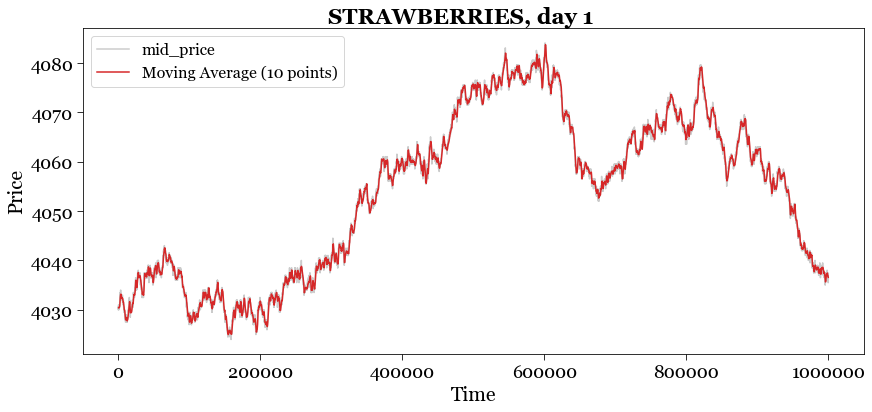

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


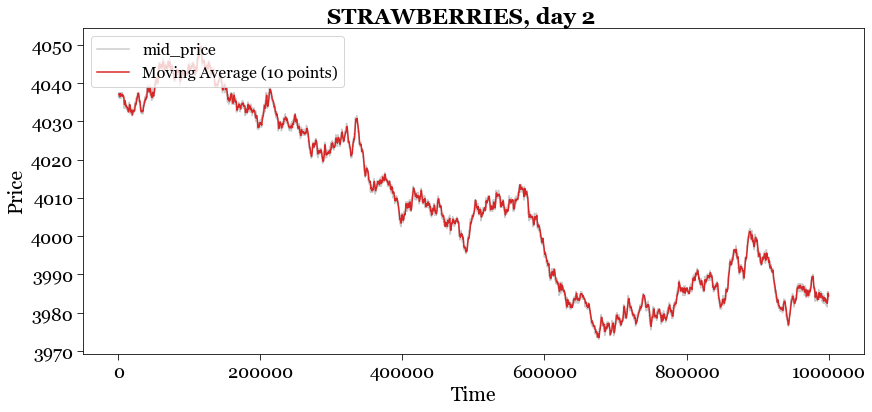

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


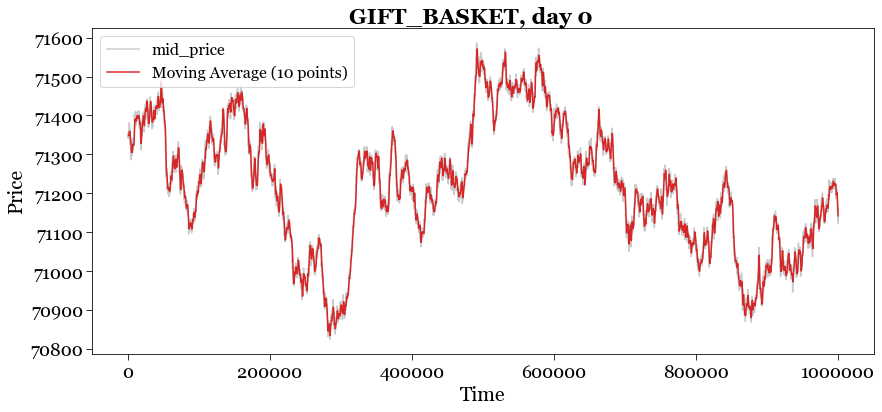

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


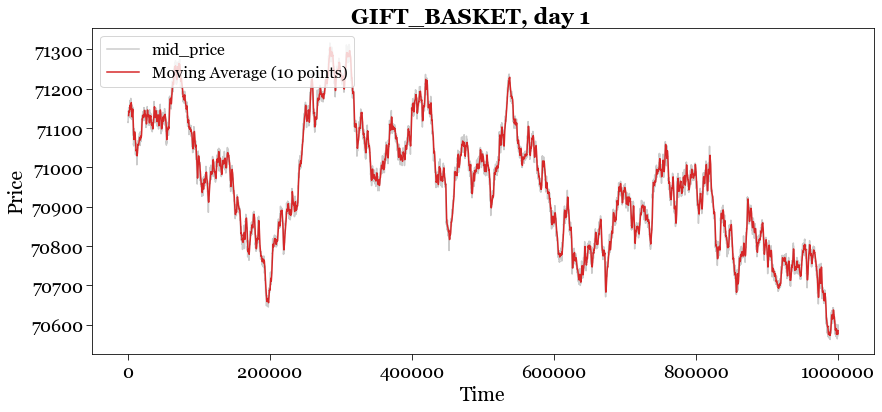

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/184758745.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


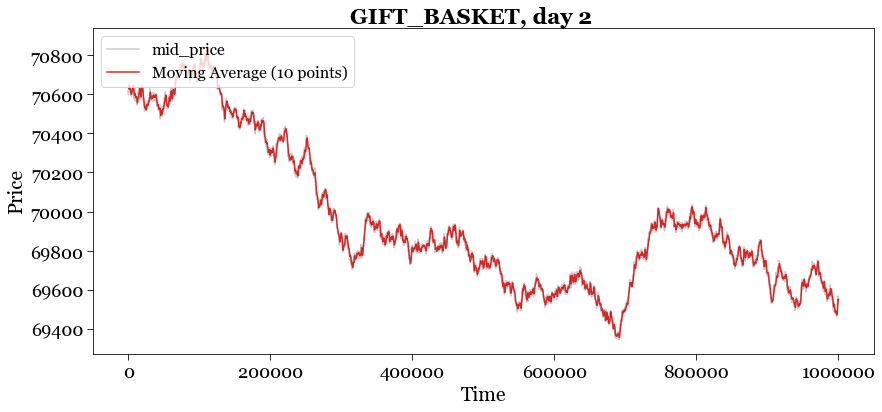

In [16]:
for product in products:
    for day in days:
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        xs = filtered_price['timestamp']
        mids = filtered_price['mid_price']

        # Calculate the moving average
        window_size = 10
        mas = mids.rolling(window=window_size).mean()

        ax.plot(xs, mids, label='mid_price', 
                color=tableau_colors[7], alpha=0.4)
        ax.plot(xs, mas, label=f'Moving Average ({window_size} points)',
                color=tableau_colors[3], alpha=1) 
                
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        plt.savefig(f'./../plots/R3_{product}_day{day}_moving_avg.png')
        plt.savefig(f'./../plots/R3_{product}_day{day}_moving_avg.pdf')
        plt.show()

A histogram of trade price
   * histogram of `price`, scaled by `quantity`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


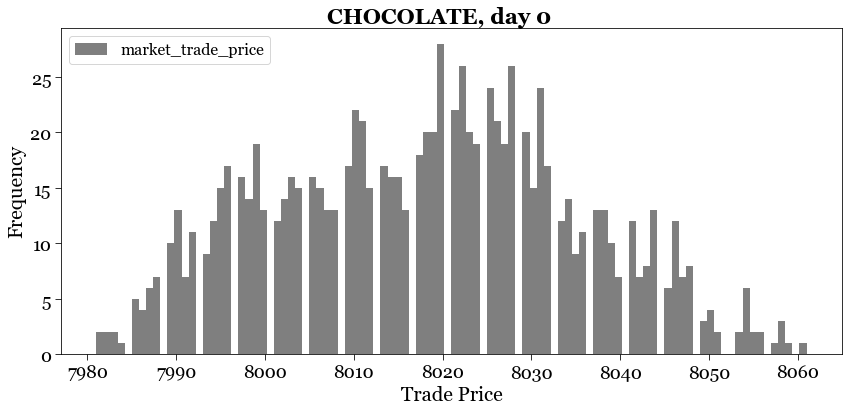

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


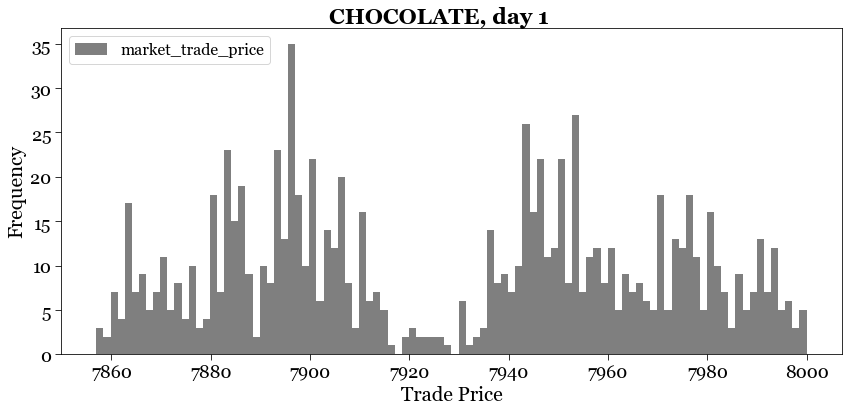

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


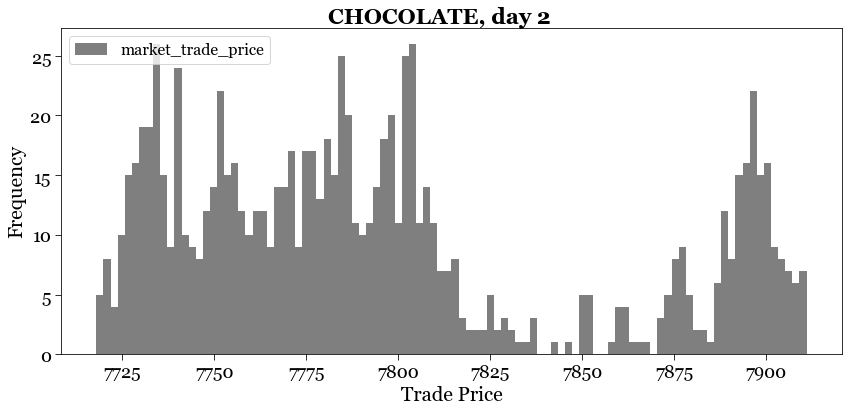

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


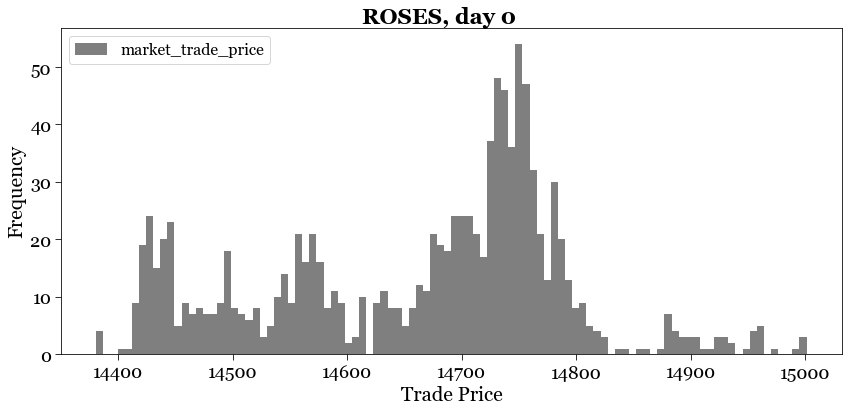

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


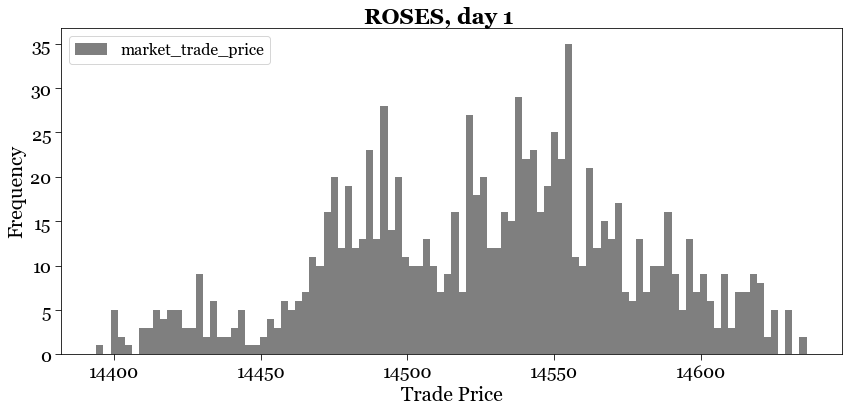

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


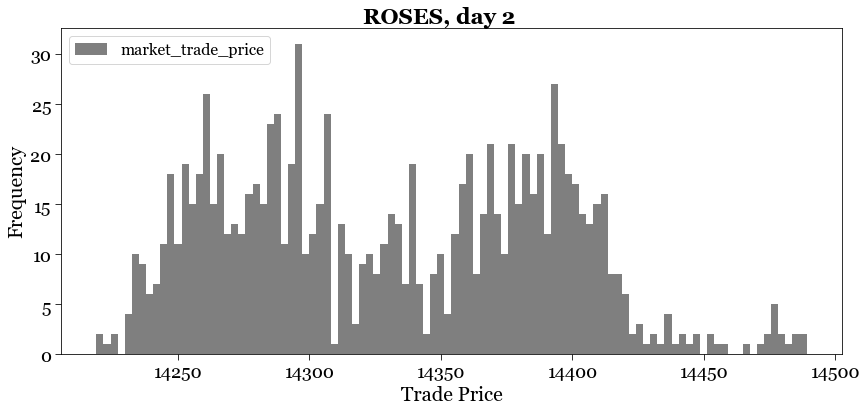

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


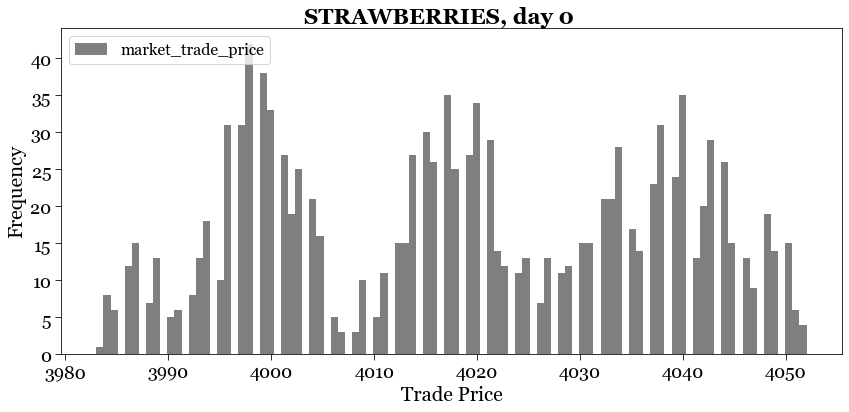

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


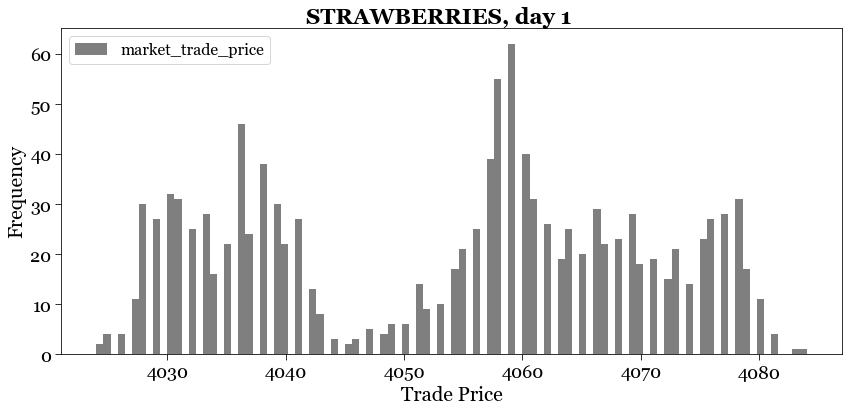

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


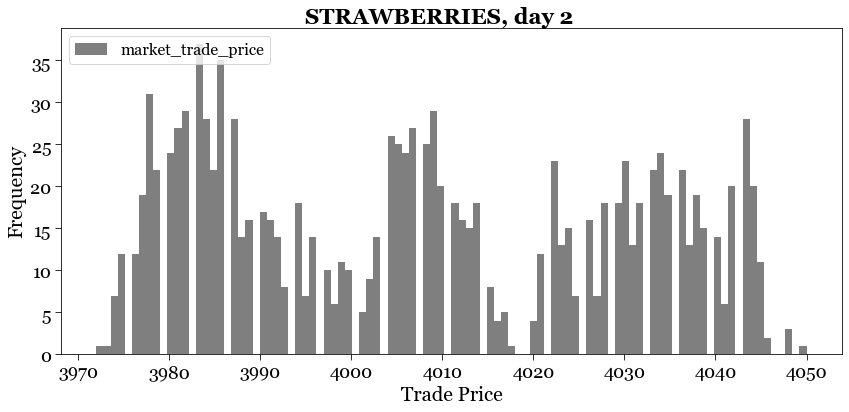

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


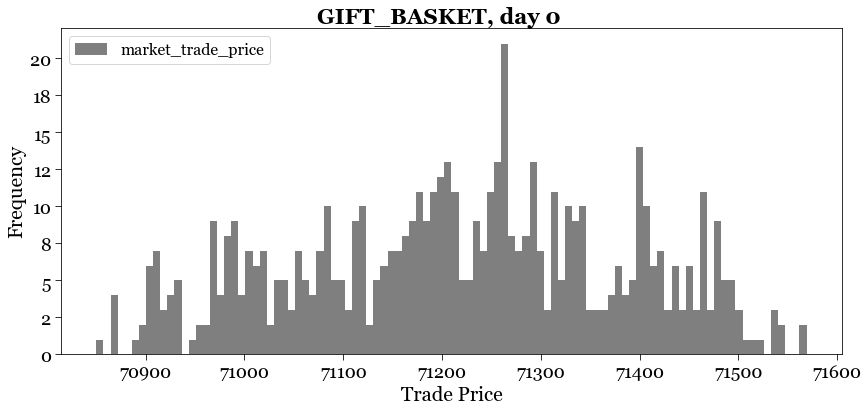

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


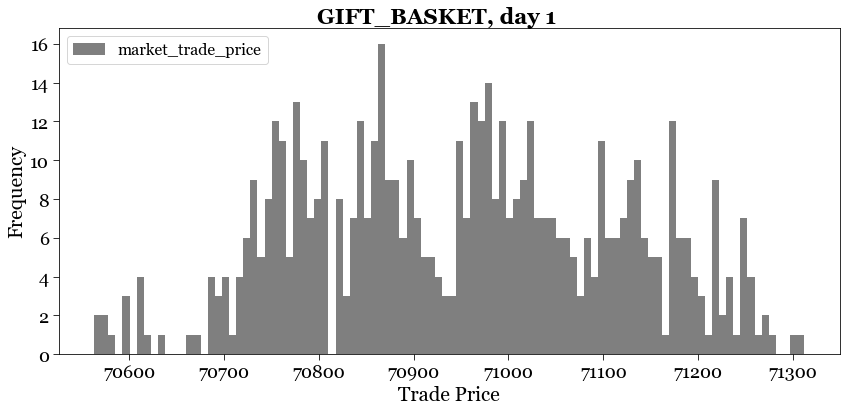

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


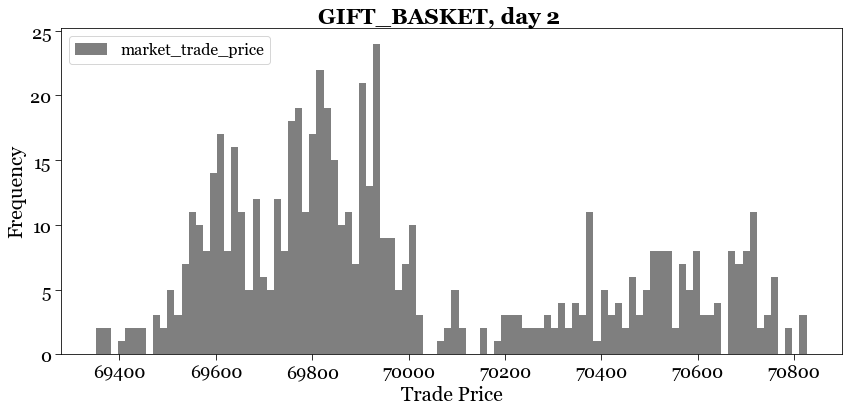

In [17]:
for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        ax.hist(filtered_trade['price'], bins=100, alpha=0.5, 
                color='black', label='market_trade_price')

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Trade Price', fontdict=font)
        plt.ylabel('Frequency', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R3_{product}_day{day}_trade_histogram.png')
        # plt.savefig(f'./../plots/R3_{product}_day{day}_trade_histogram.pdf')
        plt.show()

Plots of individual bids and asks distribution
   * histogram of `bid_price_1`, scaled by 'bid_volume_1'
   * histogram of `ask_price_1`, scaled by 'ask_volume_1'

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


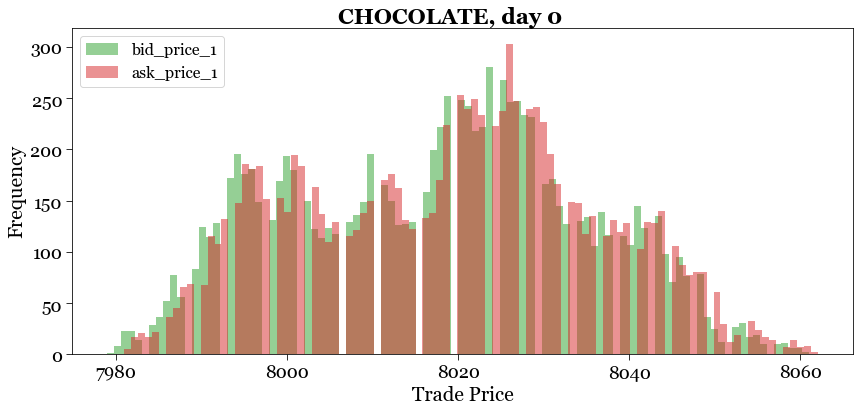

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


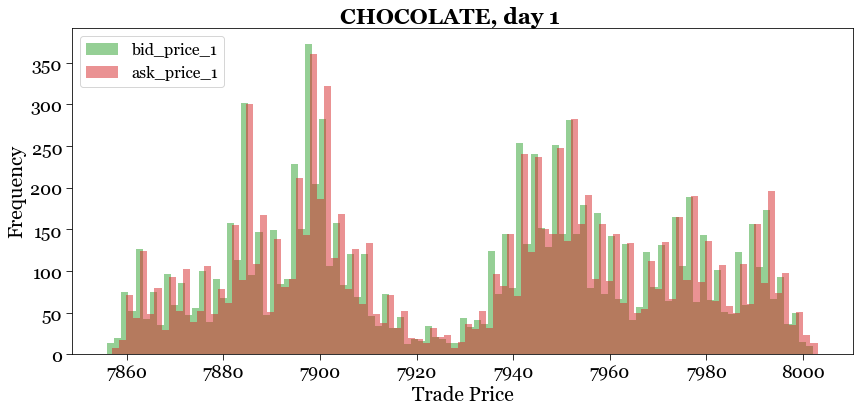

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


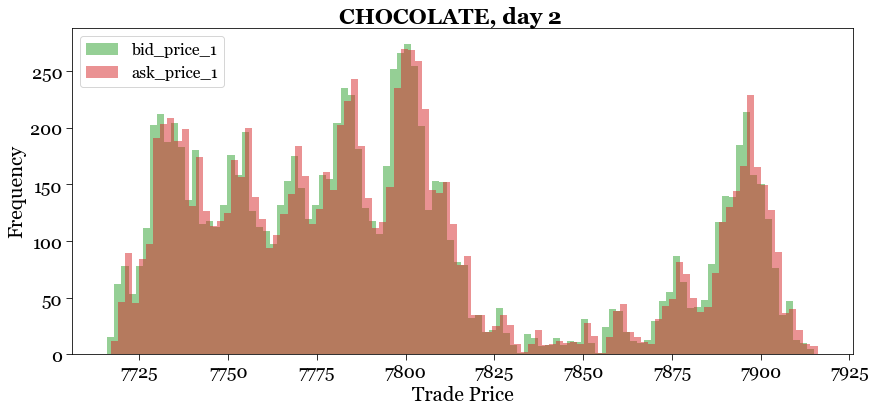

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


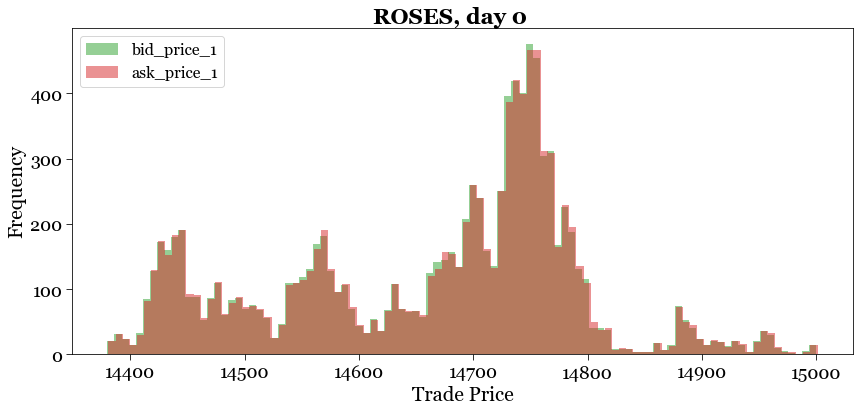

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


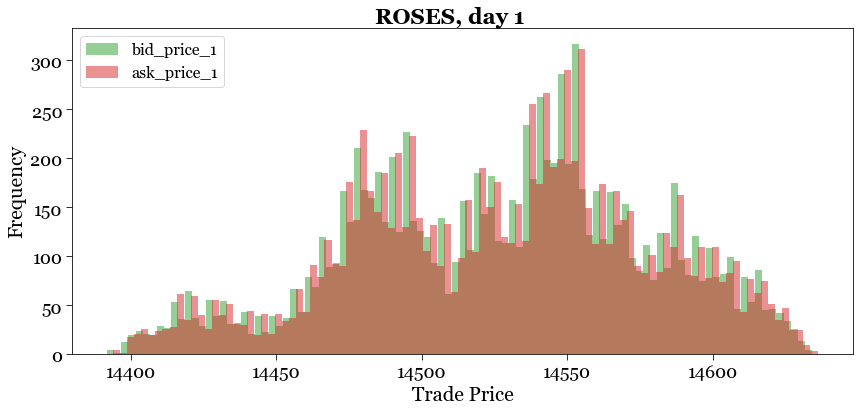

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


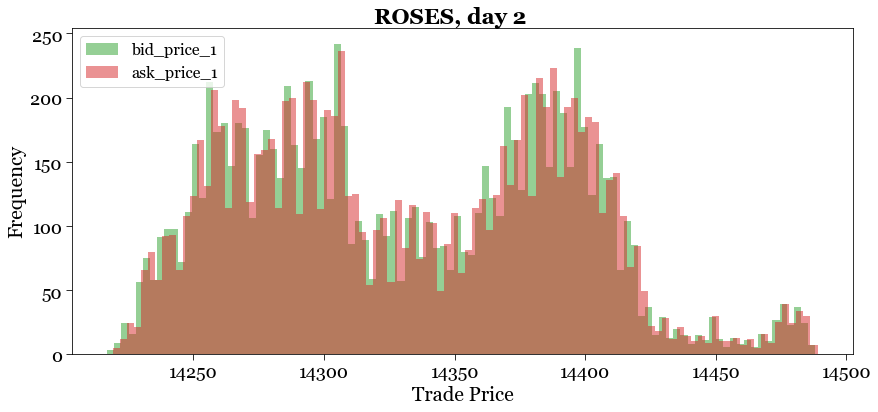

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


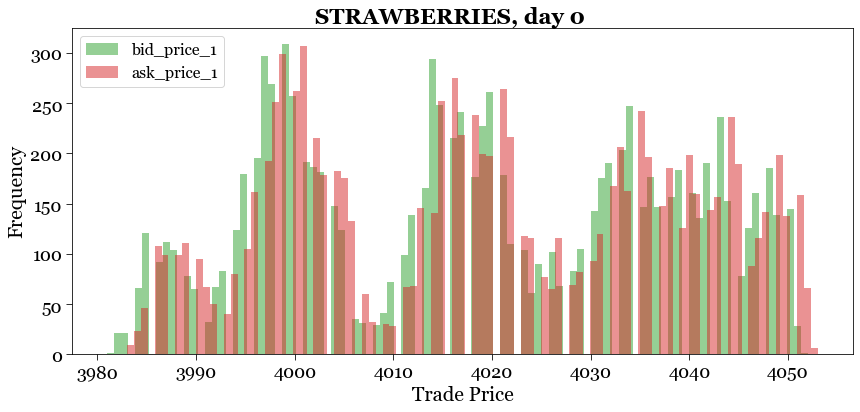

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


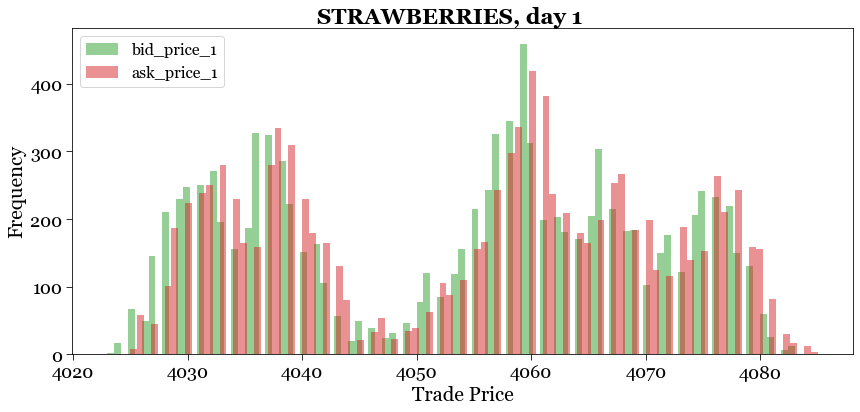

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


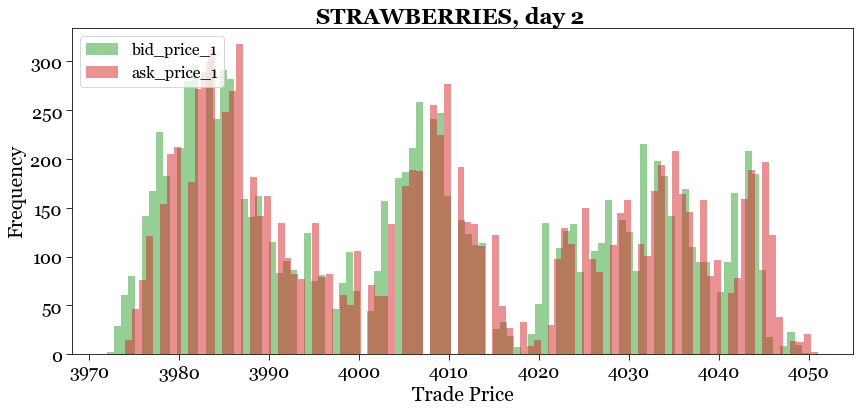

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


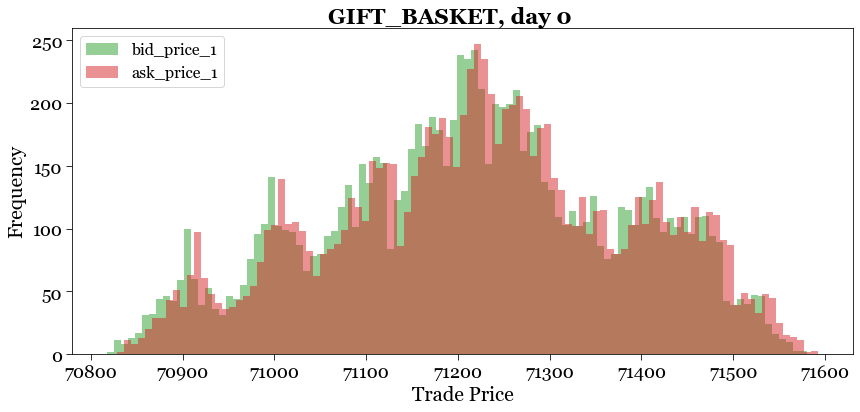

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


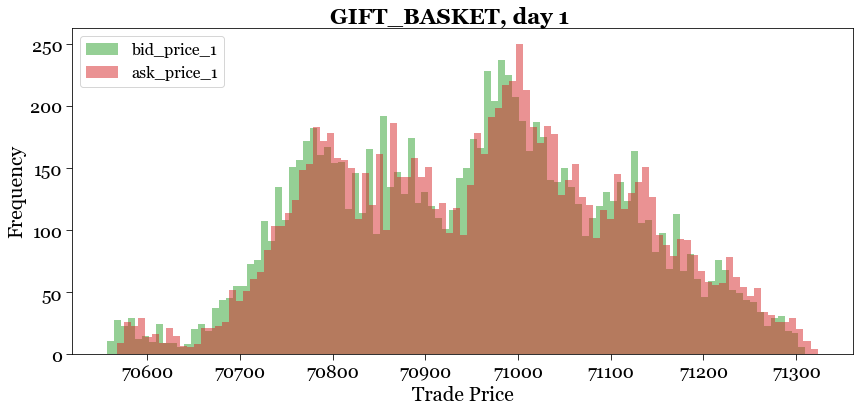

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5297/1044211083.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


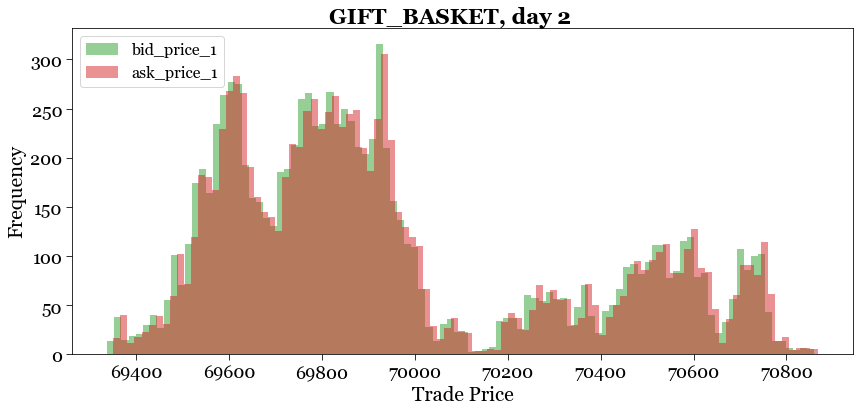

In [20]:
for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        ax.hist(filtered_price['bid_price_1'], bins=100, alpha=0.5, 
                color=tableau_colors[2], label='bid_price_1')
        ax.hist(filtered_price['ask_price_1'], bins=100, alpha=0.5, 
                color=tableau_colors[3], label='ask_price_1')
        
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Trade Price', fontdict=font)
        plt.ylabel('Frequency', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        plt.savefig(f'./../plots/R3_{product}_day{day}_bid_ask_histogram.png')
        plt.savefig(f'./../plots/R3_{product}_day{day}_bid_ask_histogram.pdf')
        plt.show()

A histogram of bid-ask spread
   * histogram of `bid_price_1` - `ask_price_1`

An overlayed line plot of trade quantity at a price point
   * when `price` = 9995
   * when `price` = 9996
   * when `price` = 9998
   * when `price` = 10000
   * when `price` = 10002
   * when `price` = 10004
   * when `price` = 10005


### Statistical visualization: for 

### Data Analysis
* Perform Technical Analysis: Use technical analysis techniques to identify patterns, trends, and signals in the stock price data. Common technical indicators include moving averages, relative strength index (RSI), and Bollinger Bands. These indicators can help you identify entry and exit points for trades.
   - moving averages
   - relative strength index (RSI) 
   - Bollinger Bands
* Correlation study
* ARIMA modeling

#### Moving Average for STARFRUIT
* Plot moving average prediction of `mid_price` vs mid price
* Performance metric

### Performance Metrics